In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ins_df=pd.read_csv('insurance.csv')

In [3]:
ins_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
ins_df.shape

(1338, 7)

In [5]:
ins_df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
ins_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

## Relation between 'BMI' and 'Expenses'

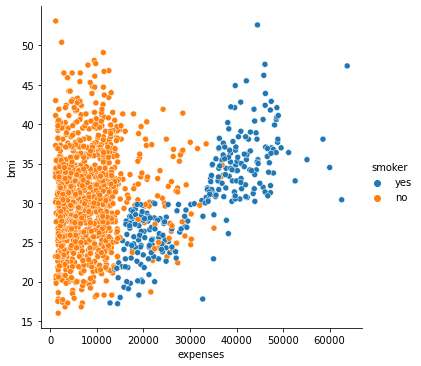

In [7]:
sns.relplot(x='expenses',y='bmi',data=ins_df,hue='smoker')

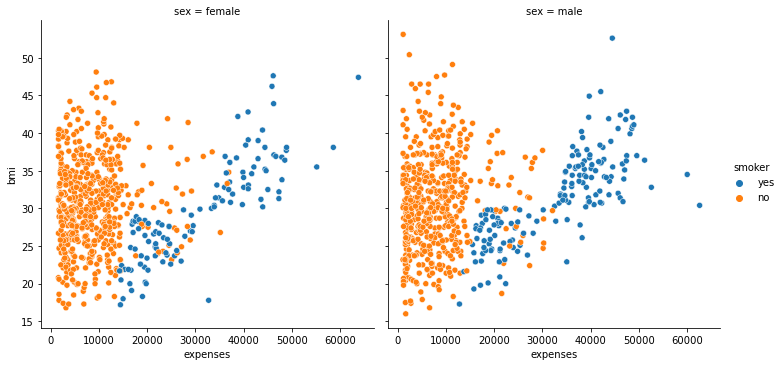

In [8]:
sns.relplot(x='expenses',y='bmi',data=ins_df,hue='smoker',col='sex')

## Preparing a Violinplot (catplot) between 'Region' & 'Expenses'

Seaborn's **Catplot** function is used to show the relationship between a numerical and a categorical variable

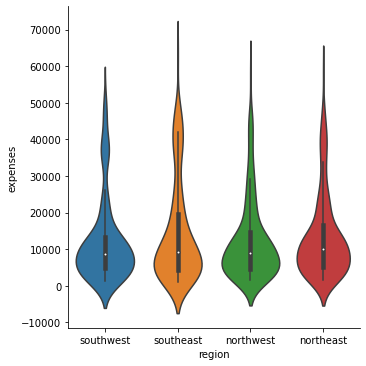

In [9]:
sns.catplot(x='region',y='expenses',kind='violin',data=ins_df)

## Boxplot between 'Region' and 'Expenses'

<AxesSubplot:xlabel='region', ylabel='expenses'>

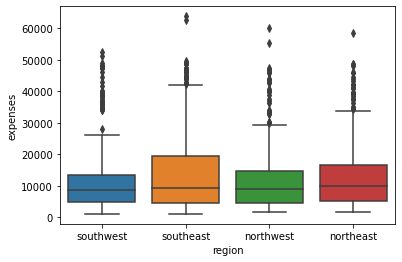

In [10]:
sns.boxplot(x='region',y='expenses',data=ins_df)

## Boxplot between 'Region' and 'Expenses' categorised by 'Sex'

<AxesSubplot:xlabel='region', ylabel='expenses'>

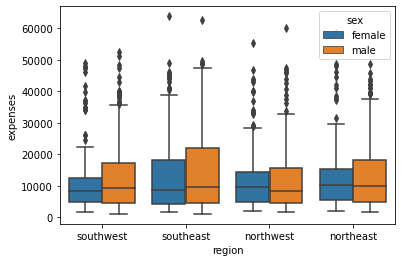

In [11]:
sns.boxplot(x='region',y='expenses',hue='sex' ,data=ins_df)

## Boxplot between 'Region' and 'Expenses' categorised by 'Smoker'

<AxesSubplot:xlabel='region', ylabel='expenses'>

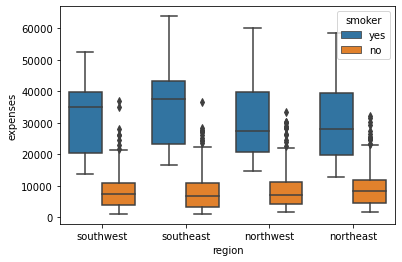

In [12]:
sns.boxplot(x='region',y='expenses',hue='smoker' ,data=ins_df)

Visibly, the premium amounts for non-smokers are quite low than the smoker group of people

## Boxplot of 'BMI'

<AxesSubplot:xlabel='bmi'>

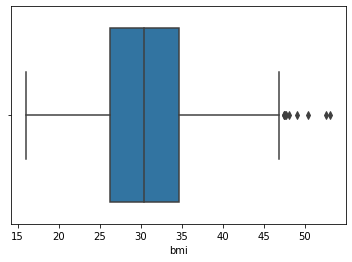

In [13]:
sns.boxplot(x='bmi',data=ins_df)

## Boxplot between 'BMI' and 'SEX' categorised by 'Smoker'

<AxesSubplot:xlabel='bmi', ylabel='sex'>

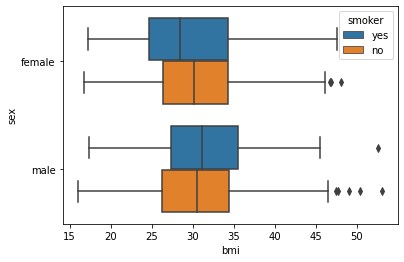

In [14]:
sns.boxplot(x='bmi',y='sex',hue='smoker' ,data=ins_df)

## Determining distribution of 'Age' column

C:\Users\PUSPAK\Anaconda3\envs\insurance\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

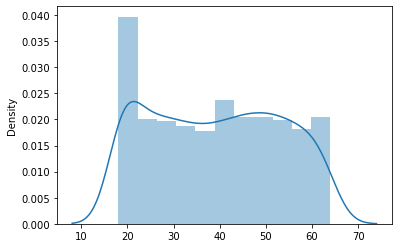

In [15]:
sns.distplot(x=ins_df['age'])

## Need to Impute 'SEX', 'SMOKER', 'REGION' with numeric values

**'SEX'** column

In [16]:
ins_df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

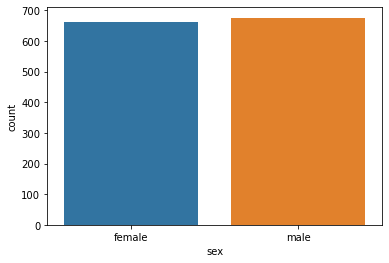

In [17]:
sns.countplot(x='sex', data=ins_df)

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
ins_df['sex']=le.fit_transform(ins_df['sex'])

In [20]:
ins_df.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


'Female'=0 & 'Male'=1

**'SMOKER'** column

In [21]:
ins_df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='count'>

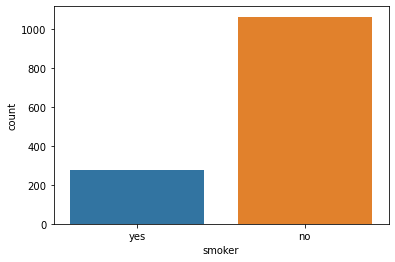

In [22]:
sns.countplot(x='smoker', data=ins_df)

In [23]:
ins_df['smoker']=le.fit_transform(ins_df['smoker'])

In [24]:
ins_df.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


'yes'=1 & 'no'=0

**'REGION'** column

In [25]:
ins_df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

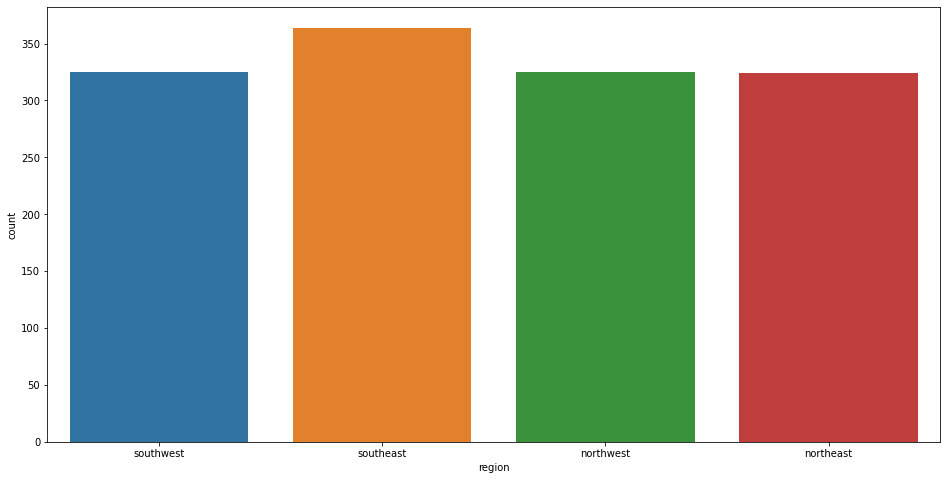

In [26]:
plt.figure(figsize=(16,8))
sns.countplot(x='region', data=ins_df)

In [27]:
ins_df['region']=le.fit_transform(ins_df['region'])

In [28]:
ins_df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


## Correlation among the features

In [29]:
corr=ins_df.corr()
print(corr)

               age       sex       bmi  children    smoker    region  expenses
age       1.000000 -0.020856  0.109341  0.042469 -0.025019  0.002127  0.299008
sex      -0.020856  1.000000  0.046380  0.017163  0.076185  0.004588  0.057292
bmi       0.109341  0.046380  1.000000  0.012645  0.003968  0.157439  0.198576
children  0.042469  0.017163  0.012645  1.000000  0.007673  0.016569  0.067998
smoker   -0.025019  0.076185  0.003968  0.007673  1.000000 -0.002181  0.787251
region    0.002127  0.004588  0.157439  0.016569 -0.002181  1.000000 -0.006208
expenses  0.299008  0.057292  0.198576  0.067998  0.787251 -0.006208  1.000000


<AxesSubplot:>

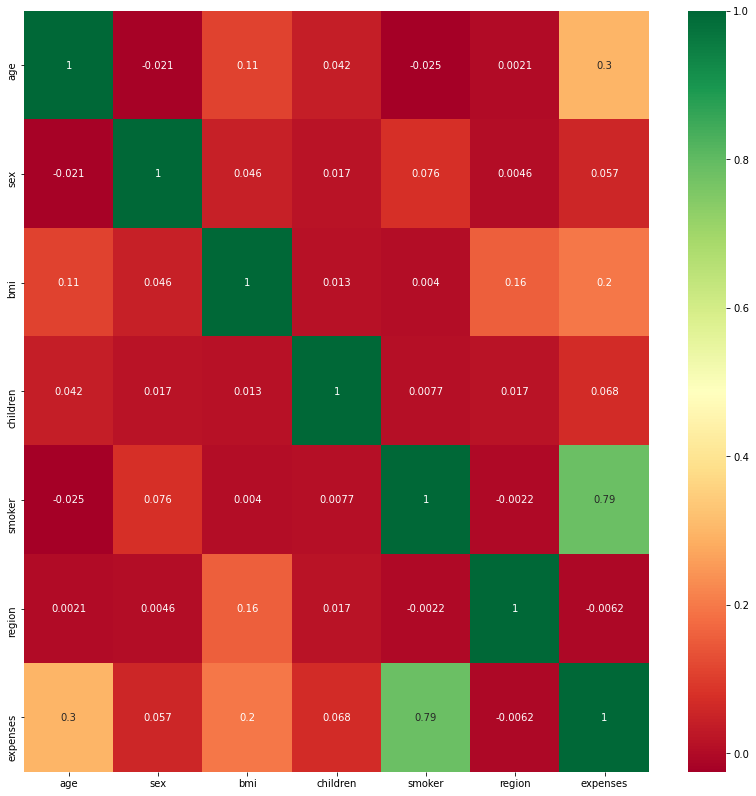

In [30]:
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, cmap='RdYlGn')

## Splitting the Dependent and Independent variable

In [31]:
X = ins_df.iloc[:, :-1].values
y = ins_df.iloc[:, -1].values

In [32]:
X

array([[19. ,  0. , 27.9,  0. ,  1. ,  3. ],
       [18. ,  1. , 33.8,  1. ,  0. ,  2. ],
       [28. ,  1. , 33. ,  3. ,  0. ,  2. ],
       ...,
       [18. ,  0. , 36.9,  0. ,  0. ,  2. ],
       [21. ,  0. , 25.8,  0. ,  0. ,  3. ],
       [61. ,  0. , 29.1,  0. ,  1. ,  1. ]])

In [33]:
y

array([16884.92,  1725.55,  4449.46, ...,  1629.83,  2007.95, 29141.36])

## Splitting the dataset into traing & testing sets

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 0)

In [35]:
X_train, y_train

(array([[19. ,  1. , 25.2,  0. ,  0. ,  1. ],
        [47. ,  1. , 38.9,  2. ,  1. ,  2. ],
        [44. ,  0. , 25. ,  1. ,  0. ,  3. ],
        ...,
        [40. ,  1. , 25.1,  0. ,  0. ,  2. ],
        [19. ,  1. , 35.5,  0. ,  0. ,  1. ],
        [33. ,  0. , 18.5,  1. ,  0. ,  3. ]]),
 array([ 1632.04, 44202.65,  7623.52, 28340.19,  3594.17, 24513.09,
         5488.26, 11842.44, 17748.51, 33900.65,  9566.99,  8017.06,
         1711.03,  4239.89,  8302.54,  2130.68,  9855.13,  1743.21,
         3392.37, 40103.89,  6250.44,  7265.7 ,  3989.84, 21195.82,
        10407.09, 12797.21,  4934.71,  6123.57,  4915.06,  1534.3 ,
         8703.46, 21677.28,  5116.5 , 46200.99,  9957.72,  6775.96,
         3046.06,  6360.99, 39722.75,  1906.36, 11737.85,  8835.26,
         8520.03,  2217.6 , 11938.26, 13047.33, 35585.58, 12124.99,
         7443.64, 13393.76, 14254.61, 36307.8 ,  8023.14, 11353.23,
        20463.  ,  3645.09, 35595.59,  4673.39, 19350.37, 18806.15,
         4399.73, 10560.49, 1

In [36]:
X_test, y_test

(array([[52. ,  1. , 30.2,  1. ,  0. ,  3. ],
        [47. ,  0. , 29.4,  1. ,  0. ,  2. ],
        [48. ,  1. , 40.6,  2. ,  1. ,  1. ],
        ...,
        [54. ,  1. , 33.6,  1. ,  0. ,  1. ],
        [55. ,  1. , 29. ,  0. ,  0. ,  0. ],
        [22. ,  0. , 21.3,  3. ,  0. ,  1. ]]),
 array([ 9724.53,  8547.69, 45702.02, 12950.07,  9644.25,  4500.34,
         2198.19, 11436.74,  7537.16,  5425.02,  6753.04, 10493.95,
         7337.75,  4185.1 , 18310.74, 10702.64, 12523.6 ,  3490.55,
         6457.84, 33475.82, 23967.38, 12643.38, 23045.57, 23065.42,
         1674.63,  4667.61,  3732.63,  7682.67,  3756.62,  8413.46,
         8059.68, 48970.25, 12979.36, 20630.28, 14571.89,  4137.52,
         8347.16, 51194.56, 40003.33,  1880.49,  5458.05,  2867.12,
        20149.32, 47496.49, 36149.48, 26018.95, 19749.38,  6940.91,
         4718.2 , 22192.44,  2899.49, 18838.7 , 23568.27, 46255.11,
        24227.34,  3268.85,  2322.62,  8827.21, 14478.33, 13112.6 ,
         1253.94, 46718.16, 1

## Perform Standardization

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [38]:
X_train[:,(0,2)] = sc.fit_transform(X_train[:,(0,2)])
X_test[:,(0,2)] = sc.transform(X_test[:,(0,2)])

In [39]:
X_train

array([[-1.47217745,  1.        , -0.88683115,  0.        ,  0.        ,
         1.        ],
       [ 0.53202004,  1.        ,  1.33174685,  2.        ,  1.        ,
         2.        ],
       [ 0.31728459,  0.        , -0.91921915,  1.        ,  0.        ,
         3.        ],
       ...,
       [ 0.03097067,  1.        , -0.90302515,  0.        ,  0.        ,
         2.        ],
       [-1.47217745,  1.        ,  0.78115085,  0.        ,  0.        ,
         1.        ],
       [-0.47007871,  0.        , -1.97182915,  1.        ,  0.        ,
         3.        ]])

## Decision Tree Regression

In [40]:
from sklearn.tree import DecisionTreeRegressor
dct = DecisionTreeRegressor()

### Finding the best parameters using GridSearchCV

In [41]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(dct,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=5,
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)

{'max_depth': 4, 'min_samples_split': 50}


### Fitting Decision Tree Regressor with best parameters on training set

In [42]:
regressor = DecisionTreeRegressor(max_depth=4, min_samples_split=20)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_split=20)

#### Prediction

In [43]:
y_pred_dtr = regressor.predict(X_test)

In [44]:
r = pd.DataFrame(y_test,y_pred_dtr)

In [45]:
r

,0
15561.312625,9724.53
9639.760303,8547.69
42478.513421,45702.02
12840.366154,12950.07
11242.216885,9644.25
...,...
12840.366154,11743.93
3485.955860,1769.53
15561.312625,10825.25
12840.366154,10796.35


In [46]:
regressor

DecisionTreeRegressor(max_depth=4, min_samples_split=20)

#### R-Squared Value

In [47]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_dtr)

0.8792688961024354

In [48]:
# get importance
importance = regressor.feature_importances_

In [49]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.12645
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.17720
Feature: 3, Score: 0.00457
Feature: 4, Score: 0.68955
Feature: 5, Score: 0.00223


In [50]:
col=['age', 'sex', 'bmi', 'children', 'smoker', 'region']

<AxesSubplot:>

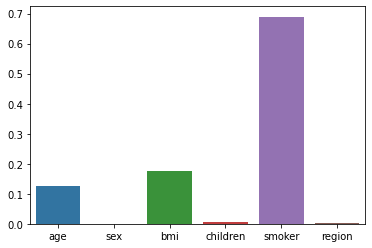

In [51]:
sns.barplot(x=col, y=importance)

It is clear from the above barchart that 'smoker' value has much more influence than others.

### Creating a Pickle file

In [52]:
import pickle

In [53]:
file = 'insurance_premium_model.pkl'

In [54]:
# dump information to the pickle file
pickle.dump(regressor, open(file, 'wb'))